**루브릭**
1. Boston 주택 가격 예측 프로젝트를 성공적으로 완료하였는가?     
프로젝트의 지시 사항을 따라 데이터 전처리, 모델 구성, 모델 학습을 올바르게 진행하였다.    

2. Reuters 데이터의 분류 프로젝트를 성공적으로 완료하였는가?    
프로젝트의 지시 사항을 따라 데이터 전처리, 모델 구성, 모델 학습을 올바르게 진행하였다.    

3. CIFAR10 데이터의 분류 프로젝트를 성공적으로 완료하였는가?    
프로젝트의 지시 사항을 따라 데이터 전처리, 모델 구성, 모델 학습을 올바르게 진행하였다.

## Boston 주택 가격 예측 모델(회귀)
Boston 주택 가격 예측 모델에서 사용되는 데이터셋은 보스턴 시의 주택 가격 데이터셋으로, 주택의 여러 요건과 가격 정보가 포함되어 있습니다.

### 데이터 로드 및 전처리
- 데이터셋의 feature에 대한 설명   <br> 
<img src ="https://drive.google.com/uc?id=1iQZ85dyCh-8pRd2AYhPMJadOSQOZCk9s" height = 300 width = 250>


In [ ]:
from tensorflow.keras import models, layers, utils
import matplotlib.pyplot as plt

In [ ]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [ ]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis = 0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

### 모델 구성 및 컴파일
- 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.


In [ ]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델은 loss와 metrics를 mse로 사용합니다.
# 현범님 코드

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

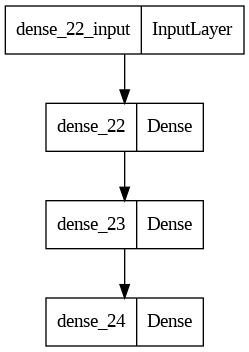

In [ ]:
utils.plot_model(model)

### 모델 학습
- epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

In [ ]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                896       
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_data, train_labels,
                    batch_size=50,
                    epochs=40,
                    validation_split=0.2)

Epoch 1/40
7/7 [==============================] - 1s 28ms/step - loss: 550.1035 - mae: 21.6155 - val_loss: 591.6412 - val_mae: 22.5656
Epoch 2/40
7/7 [==============================] - 0s 10ms/step - loss: 503.8715 - mae: 20.5548 - val_loss: 547.0950 - val_mae: 21.5921
Epoch 3/40
7/7 [==============================] - 0s 9ms/step - loss: 460.9887 - mae: 19.5277 - val_loss: 500.7727 - val_mae: 20.5459
Epoch 4/40
7/7 [==============================] - 0s 7ms/step - loss: 416.3915 - mae: 18.4220 - val_loss: 451.3435 - val_mae: 19.3674
Epoch 5/40
7/7 [==============================] - 0s 6ms/step - loss: 367.5804 - mae: 17.1627 - val_loss: 396.2839 - val_mae: 17.9739
Epoch 6/40
7/7 [==============================] - 0s 6ms/step - loss: 315.8941 - mae: 15.7002 - val_loss: 341.8719 - val_mae: 16.4951
Epoch 7/40
7/7 [==============================] - 0s 7ms/step - loss: 264.9162 - mae: 14.1751 - val_loss: 284.1223 - val_mae: 14.7410
Epoch 8/40
7/7 [==============================] - 0s 6ms/ste

위에서 나눠주지 못했던 validation set을 분리해주었다. 

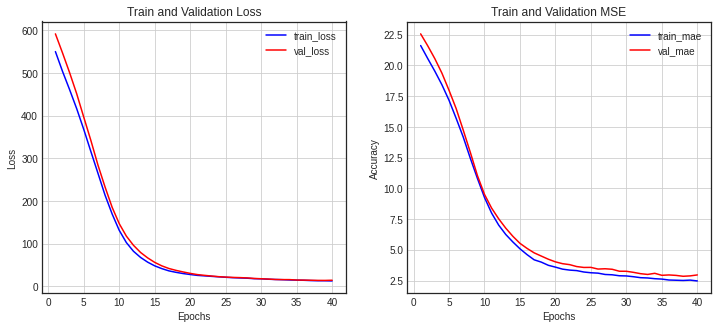

In [ ]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MSE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측
- 테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.

In [ ]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 21.9435 - mae: 3.3690


[21.943527221679688, 3.368997097015381]

In [ ]:
pred_ys = model.predict(test_data)
print(pred_ys.shape)
print(pred_ys[0])

4/4 [==============================] - 0s 3ms/step
(102, 1)
[7.434495]


## Reuters 딥러닝 모델(다중 분류)
이번 스텝에서는 8번 노드에 나왔던 모델과 동일한 모델을 실습합니다. 하지만 다양한 성능 향상 방법을 사용하여 8번 노드에서의 딥러닝 모델보다 성능을 더 높일 수 있습니다. 8번 노드에서 사용했던 ReLU와는 다른 활성화함수를 사용해보고, BatchNormalization과 Dropout을 적용해 봅시다. ModelCheckpoint와 EarlyStopping 콜백 함수도 적용해 보세요.    


- 로이터 뉴스 기사 데이터셋
- 8,982개의 훈련 데이터셋과 2,246개의 테스트 데이터셋으로 구분
- 뉴스 기사의 주제로 46개 레이블 

### 데이터 로드 및 전처리
- 텍스트 데이터를 벡터로 변환
- 일반적으로 자주 사용되는 원-핫 인코딩(one-hot encoding)을 이용하여 텍스트를 0과 1의 벡터로 변환
- 뉴스 주제인 레이블도 원-핫 인코딩(범주형 인코딩)을 이용해 변환 수행 
- reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 reuters 데이터 셋을 활용하고, 이때 파라메터 조정을 통해 단어의 개수는 10000개로 제한합니다(num_words=10000).
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [ ]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
from tensorflow.keras.datasets import reuters
from sklearn.model_selection import train_test_split

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels,
                                                  test_size=0.25,
                                                  random_state=123)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print("전체 학습 데이터: {}  레이블: {}".format(train_data.shape, train_labels.shape))
print("학습용 데이터: {}  레이블: {}".format(x_train.shape, y_train.shape))
print("검증용 데이터: {}  레이블: {}".format(x_val.shape, y_val.shape))
print("테스트용 데이터: {}  레이블: {}".format(test_data.shape, test_labels.shape))


전체 학습 데이터: (8982,)  레이블: (8982,)
학습용 데이터: (6736,)  레이블: (6736,)
검증용 데이터: (2246,)  레이블: (2246,)
테스트용 데이터: (2246,)  레이블: (2246,)


- 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다. 원-핫 인코딩 함수를 직접 만들어보세요.
- 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

In [ ]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
# [[YOUR CODE]]
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]
from tensorflow.keras import utils

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 모델 구성 및 컴파일
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 46개의 뉴스 주제를 분류하는 딥러닝 모델을 구성합니다.


In [ ]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Input(shape=(10000, )))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(46))
model.add(layers.Activation('softmax'))

다중분류를 위해 softmax 사용한다.  <br>
<br>
준아님 Tip : 그래프 넣고 BatchNormalization+Activation+Dropout이 한 층이므로 한 줄 띄우는게 좋다. softmax는 꼭 마지막에 써야하고, 가운데는 relu 쓰는게 일반적 

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1280128   
                                                                 
 batch_normalization_8 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 128)               0         
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                      

### 모델 학습
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [ ]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('keras_reuters_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                  restore_best_weights=True)

준아님 Tip : batch size는 컴퓨터가 인식하기 쉽게 2의 제곱 형태로 쓰는게 좋다.  

In [ ]:
history = model.fit(x_train, y_train, epochs=1000, batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/1000
14/14 [==============================] - 3s 118ms/step - loss: 3.3748 - accuracy: 0.2548 - val_loss: 3.4544 - val_accuracy: 0.6033
Epoch 2/1000
14/14 [==============================] - 1s 102ms/step - loss: 1.9967 - accuracy: 0.5778 - val_loss: 3.0128 - val_accuracy: 0.6563
Epoch 3/1000
14/14 [==============================] - 1s 98ms/step - loss: 1.4766 - accuracy: 0.6731 - val_loss: 2.6885 - val_accuracy: 0.6821
Epoch 4/1000
14/14 [==============================] - 1s 102ms/step - loss: 1.2561 - accuracy: 0.7209 - val_loss: 2.4639 - val_accuracy: 0.7012
Epoch 5/1000
14/14 [==============================] - 1s 102ms/step - loss: 1.1105 - accuracy: 0.7458 - val_loss: 2.2609 - val_accuracy: 0.7168
Epoch 6/1000
14/14 [==============================] - 1s 97ms/step - loss: 0.9986 - accuracy: 0.7709 - val_loss: 2.0768 - val_accuracy: 0.7280
Epoch 7/1000
14/14 [==============================] - 1s 98ms/step - loss: 0.8813 - accuracy: 0.7932 - val_loss: 1.9087 - val_accuracy: 0.

- 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

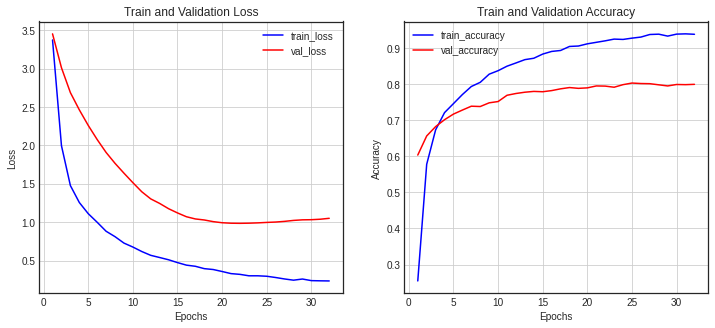

In [ ]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측
- 테스트 데이터셋을 이용해 모델을 평가합니다

In [ ]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 6ms/step - loss: 0.9723 - accuracy: 0.8010


[0.9722854495048523, 0.800979495048523]

## CIFAR10 딥러닝 모델
CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있습니다. 데이터셋의 각 이미지는 10개의 클래스로 라벨링 되어 있으며, 머신러닝 연구에 가장 널리 사용되고 있습니다.  

- 32x32X3 크기의 이미지를 3072 크기로 변형(reshape)
- 0 ~ 255 사이의 값을 가지는 이미지를 0~1 사이의 값으로 변환 -> 255로 나눔 

### 데이터 로드 및 전처리
- CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [ ]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 3s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (35000, 32, 32, 3) 레이블: (35000, 1)
검증 데이터: (15000, 32, 32, 3) 레이블: (15000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


- class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [ ]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

- 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다

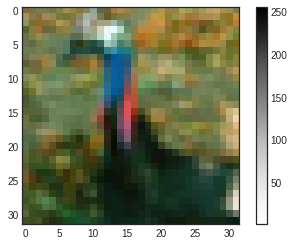

In [ ]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [ ]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(10000, 32, 32, 3)


- 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

In [ ]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
# [[YOUR CODE]]
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

# Q. -1은 뭐지?

(35000, 3072)
(15000, 3072)
(10000, 3072)


In [ ]:
print(x_train[0])

[130 108  50 ...   7  30  18]


In [ ]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [ ]:
print(x_train[0])

[0.50980392 0.42352941 0.19607843 ... 0.02745098 0.11764706 0.07058824]


### 모델 구성 및 컴파일
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.


In [ ]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]

model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 2048)              6293504   
                                                                 
 batch_normalization_10 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 2048)              0         
                                                                 
 dropout_10 (Dropout)        (None, 2048)              0         
                                                                 
 dense_16 (Dense)            (None, 1024)              2098176   
                                                                 
 batch_normalization_11 (Bat  (None, 1024)             4096      
 chNormalization)                                     

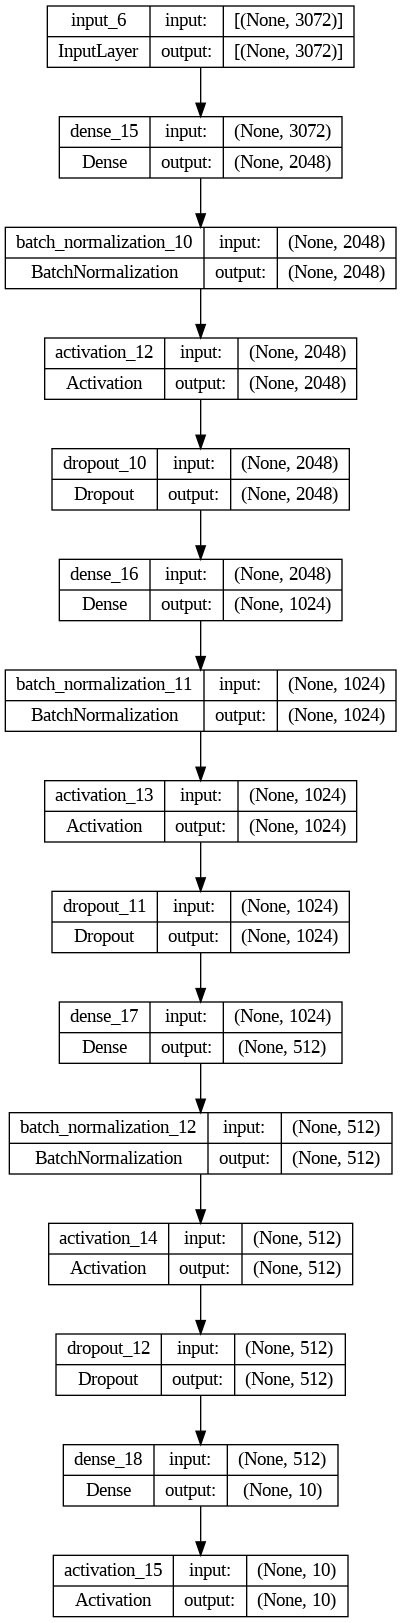

In [ ]:
utils.plot_model(model, show_shapes=True)

### 모델 학습
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [ ]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
check_point_cb = callbacks.ModelCheckpoint('keras_cifar10_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                  restore_best_weights=True)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
69/69 [==============================] - 40s 565ms/step - loss: 2.7005 - accuracy: 0.1548 - val_loss: 2.1791 - val_accuracy: 0.1695
Epoch 2/60
69/69 [==============================] - 36s 524ms/step - loss: 2.4107 - accuracy: 0.2142 - val_loss: 2.0578 - val_accuracy: 0.2502
Epoch 3/60
69/69 [==============================] - 36s 527ms/step - loss: 2.2725 - accuracy: 0.2450 - val_loss: 1.9636 - val_accuracy: 0.2960
Epoch 4/60
69/69 [==============================] - 35s 514ms/step - loss: 2.1862 - accuracy: 0.2611 - val_loss: 1.8837 - val_accuracy: 0.3287
Epoch 5/60
69/69 [==============================] - 35s 515ms/step - loss: 2.1275 - accuracy: 0.2783 - val_loss: 1.8144 - val_accuracy: 0.3547
Epoch 6/60
69/69 [==============================] - 37s 544ms/step - loss: 2.0648 - accuracy: 0.2906 - val_loss: 1.7678 - val_accuracy: 0.3689
Epoch 7/60
69/69 [==============================] - 36s 518ms/step - loss: 2.0334 - accuracy: 0.2978 - val_loss: 1.7337 - val_accuracy: 0.3821

- 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

In [ ]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

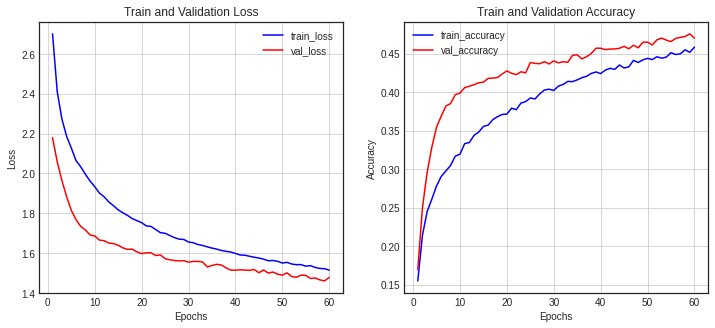

In [ ]:
show_history(history)

 ### 모델 평가 및 예측
- 테스트 데이터셋을 이용해 모델을 평가합니다.

In [ ]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 9s 29ms/step - loss: 1.4664 - accuracy: 0.4750


[1.466352105140686, 0.4749999940395355]

## 회고

#### <헤맸던 것>
- 익스 노드와 참고한 노드의 변수명이 달라 바꿔줘야하는데, 딥러닝의 전체적인 구조 파악이 안돼서 어느 부분을 어떻게 고칠지 파악하는데 시간이 걸렸다. 
- 노드가 꼬여 x_test와 y_test의 차원이 달라, 퍼실님께 여쭤보기까지 많이 헤맸다. 
- 원-핫 인코딩한 데이터는 categorical_crossentropy를 써야하는데, 구분 못하고 노드 따라 sparse_categorical_crossentropy 썼다가 graph execution 에러가 생겼다..어떤 부분이 잘못됐는지 몰라서 퍼실님께 여쭤보고 알게되었다.   

#### <새로 알게된 것>
- 모델에 layer를 넣어줄 때 dense, batch nomarlization, activation, dropout으로 한 겹이 구성되므로 코드도 한 줄 띄어써주는게 좋다.
- 처음과 중간에는 relu를 쓰고, softmax는 마지막에 쓴다. 
- 어느부분에서 어떻게 잘못된지 모르겠을 땐, 한 줄씩 출력해보거나 변수를 출력해보는 것도 좋은 방법이다. 

#### <아직도 모르는 것>
- 활성화함수를 다른걸로 바꿔서 더 높은 정확도를 얻을 수 있을까?
- 딥러닝의 첫 번째 프로젝트라 노드의 내용을 많이 참고했는데, 아직 전체적인 구조를 잘 모르겠다. 
- 데이터의 종류에 따라 어떨 때 뭐를 쓰는지 모르겠다. 
- 머신러닝 할 때와 달리, 데이터프레임으로 데이터를 뜯어볼 수 없으니 데이터 자체를 잘 모르겠다. 
- 1번 프로젝트에서 pred_ys가 다른 노드에 있길래 썼는데, 뭔지 모르겠다.